# Data Visualization

In [1]:
# read data
%store -r cv_table_lr
%store -r cv_table_nb
%store -r subreddit_1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

The goal is to create data visualization/analysis for both Logistic Regression model and Naive Bayes model.

## Based on Logistic Regression:

### 1. Scatter plot to show the relationship between frequency(word_count) and coef.

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


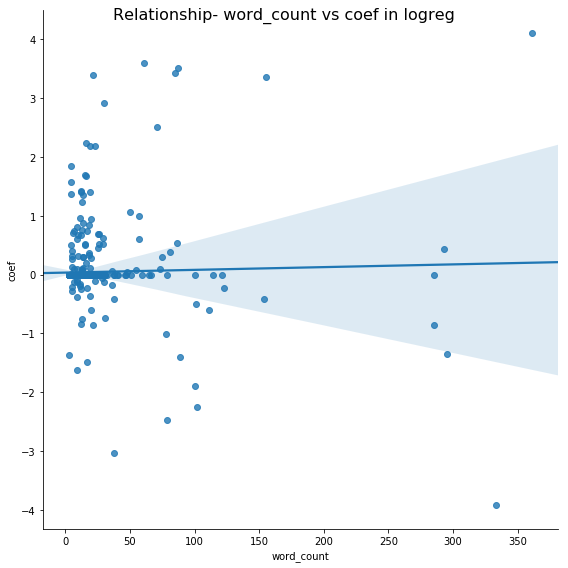

In [3]:
# Check overall if they are linearly related
ax = sns.lmplot(x="word_count", 
               y="coef", 
               data=cv_table_lr,
#                col="class",
               size=8)
# set title
ax.fig.suptitle("Relationship- word_count vs coef in logreg", fontsize=16);

### 2. Bar Chart to show the distribution of frequency and coef

In [4]:
# pick the top 50 words with the highest word count
df = cv_table_lr.sort_values(by='word_count', ascending=False).head(50)
# set column-word as index
df = df.set_index('word')

Text(0.5, 0.98, 'Relationship- word_count vs coef in logreg (Top 50 words)')

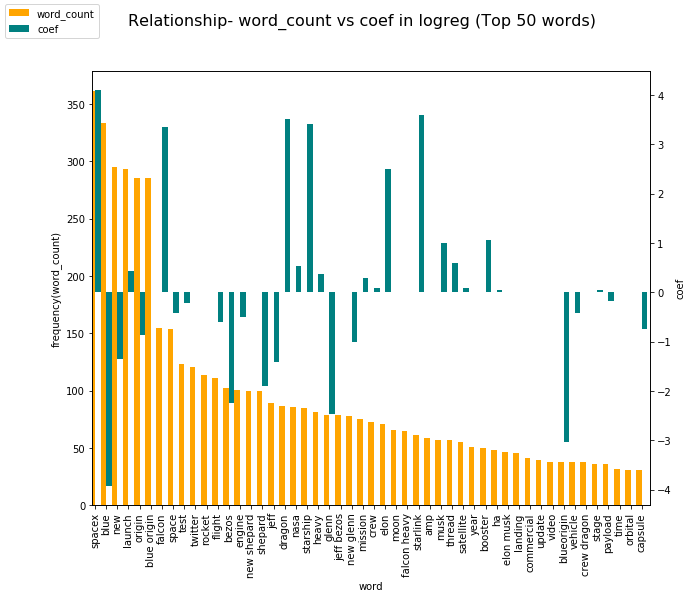

In [5]:
fig = plt.figure(figsize=(10, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df['word_count'].plot(kind='bar', color='orange', ax=ax, 
#                       width=width, 
                      position=1)
df['coef'].plot(kind='bar', color='teal', ax=ax2, 
#                 width=width, 
                position=0)

ax.set_ylabel('frequency(word_count)')
ax2.set_ylabel('coef')

fig.legend(loc=2)
fig.suptitle('Relationship- word_count vs coef in logreg (Top 50 words)', fontsize=16)

## Based on Naive Bayes:

In [6]:
# top words (with high prob for spacex (1)
cv_table_nb.sort_values(by=1, ascending=False).head(15)

,0,1
spacex,0.002912,0.051804
launch,0.016618,0.029645
falcon,0.001199,0.022458
twitter,0.004797,0.014224
dragon,0.000171,0.013176
starship,0.000343,0.012726
heavy,0.001542,0.011080
elon,0.000343,0.010630
crew,0.001885,0.009582
starlink,0.000171,0.009283


In [7]:
# top words (with high prob for blueorigin (0)
cv_table_nb.sort_values(by=0, ascending=False).head(15)

,0,1
blue,0.056707,0.000599
origin,0.048655,0.000449
new,0.043687,0.006288
space,0.018331,0.007336
shepard,0.017303,0.000150
bezos,0.017303,0.000449
launch,0.016618,0.029645
jeff,0.015076,0.000449
rocket,0.014220,0.004941
glenn,0.013706,0.000150


In [8]:
# use 7th post as an example
subreddit_1['post'][7].lower()

'spacex s starhopper venting  best video to the date  april        '

In [9]:
post_7_res = cv_table_nb.loc[['spacex', 'starhopper', 'venting', 'best', 'video', 'date', 'april']]
post_7_res

,0,1
spacex,0.002912,0.051804
starhopper,0.000171,0.002246
venting,0.000171,0.000749
best,0.000343,0.000599
video,0.002741,0.003593
date,0.000343,0.002246
april,0.000514,0.001797


In [10]:
# calculate prob for each word under group0
prob_cond_0 = 1
for p in post_7_res[0]:
    prob_cond_0 = prob_cond_0 * p
prob_cond_0

1.4139117282146084e-23

In [11]:
# calculate prob for each word under group1
prob_cond_1 = 1
for p in post_7_res[1]:
    prob_cond_1 = prob_cond_1 * p
prob_cond_1

7.563120085402186e-19

In [18]:
# since there are 736 posts from group1 and 738 posts from group0
prob_overall_1 = 736 / (736 + 738)
prob_overall_0 = 738 / (736 + 738)

In [19]:
# numerator of Naive Bayes formula
prob_0 = prob_cond_0 * prob_overall_0
prob_1 = prob_cond_1 * prob_overall_1
print(prob_0)
print(prob_1)

7.079150986583318e-24
3.776429025004077e-19


In [21]:
# prob that this post belongs to group1
prob_1/(prob_0+prob_1)

0.9999812547296953

In [22]:
# prob that this post belongs to group0
prob_0/(prob_0+prob_1)

1.874527030460186e-05